# 단일 숫자 순차열 데이터 분류 Template


# 데이터 준비

In [26]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

In [27]:
numbers = np.zeros((2000,1))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))

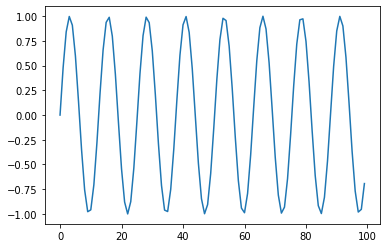

In [28]:
plt.plot(numbers[:100,0])
plt.show()

In [29]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

12345678901234567890의 숫자열로 다음의 입출력 데이터를 생성한다.
```
12345 -> T
23456 -> F
34567 -> T
...
56789 -> F
```

In [30]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  next_value = numbers[i+SEQUENCE_LENGTH+OFFSET-1]
  raw_y.append([ int((next_value)>0) ])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9>0 -> True -> 1

In [31]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [32]:
print(raw_x[0])
print(raw_y[0])

[[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]
[1]


In [33]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 1)
(1994, 1)
Training Data:
(1794, 5, 1)
(1794, 1)
Test Data:
(200, 5, 1)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[0.07960864]
 [0.54776709]
 [0.88181305]
 [0.99996043]
 [0.87328261]]

train_y[0]
 [1]


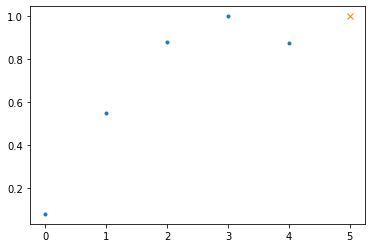

In [34]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')

plt.show()

# Template

## LSTM

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               66560     
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 66,818
Trainable params: 66,818
Non-trainable params: 0
_________________________________________________________________


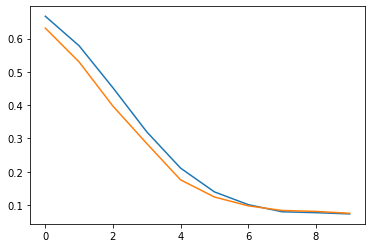

7/7 [==============================] - 0s 3ms/step - loss: 0.0619 - acc: 0.9800
loss= 0.061871711164712906
acc= 0.9800000190734863


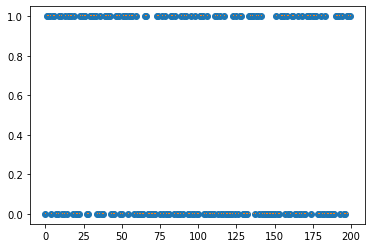

In [35]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## GRU

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 128)               50304     
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 258       
Total params: 50,562
Trainable params: 50,562
Non-trainable params: 0
_________________________________________________________________


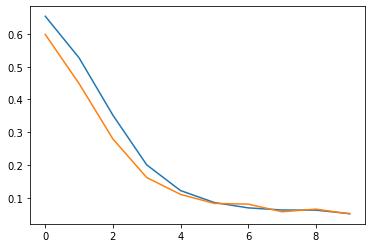

7/7 [==============================] - 0s 2ms/step - loss: 0.0426 - acc: 0.9850
loss= 0.042581707239151
acc= 0.9850000143051147


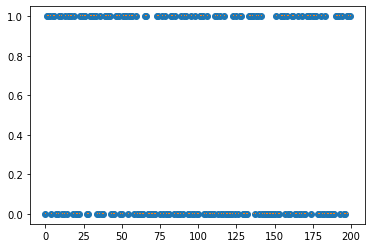

In [36]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## Bidirectional + LSTM

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 256)               133120    
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 133,634
Trainable params: 133,634
Non-trainable params: 0
_________________________________________________________________


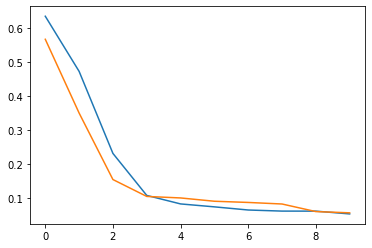

7/7 [==============================] - 0s 4ms/step - loss: 0.0406 - acc: 0.9900
loss= 0.04063275828957558
acc= 0.9900000095367432


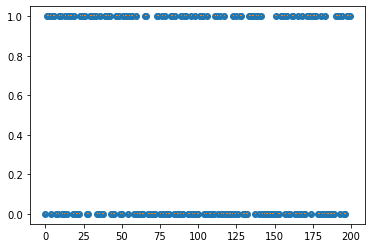

In [37]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Bidirectional(LSTM(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## Bidirectional + GRU

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 256)               100608    
_________________________________________________________________
flatten_10 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 514       
Total params: 101,122
Trainable params: 101,122
Non-trainable params: 0
_________________________________________________________________


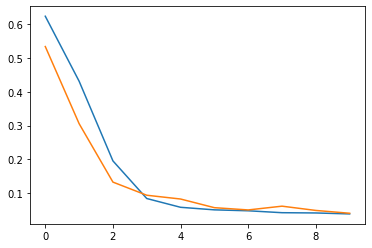

7/7 [==============================] - 0s 3ms/step - loss: 0.0410 - acc: 0.9850
loss= 0.04095330834388733
acc= 0.9850000143051147


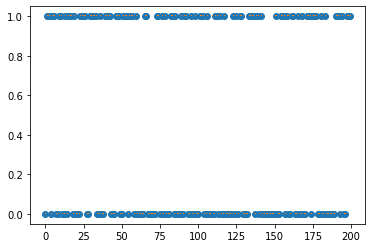

In [38]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Bidirectional(GRU(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## stacked

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 128)            66560     
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 198,402
Trainable params: 198,402
Non-trainable params: 0
_________________________________________________________________


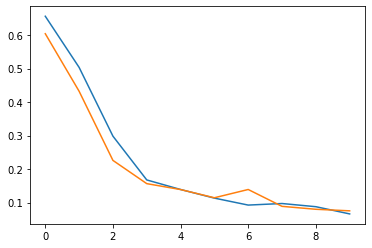

7/7 [==============================] - 0s 3ms/step - loss: 0.0750 - acc: 0.9650
loss= 0.07504976540803909
acc= 0.9649999737739563


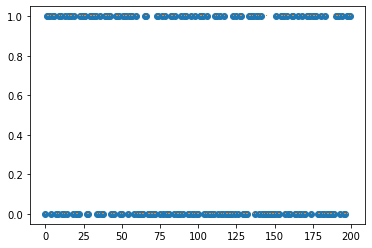

In [39]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## CNN

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 5, 32)             128       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 32)              

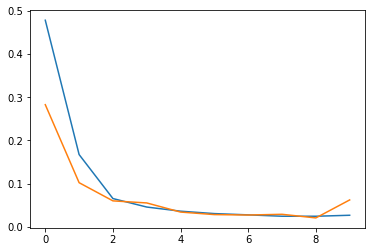

7/7 [==============================] - 0s 3ms/step - loss: 0.0273 - acc: 0.9900
loss= 0.027341768145561218
acc= 0.9900000095367432


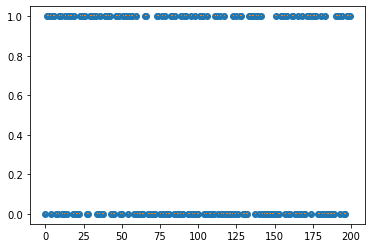

In [40]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()

## CNN + LSTM

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 5, 32)             128       
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5, 32)             3104      
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               82432     
_________________________________________________________________
flatten_13 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
Total params: 85,922
Trainable params: 85,922
Non-trainable params: 0
_________________________________________________________________


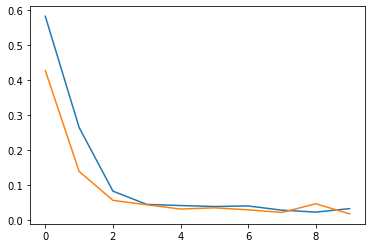

7/7 [==============================] - 0s 3ms/step - loss: 0.0186 - acc: 0.9900
loss= 0.018621616065502167
acc= 0.9900000095367432


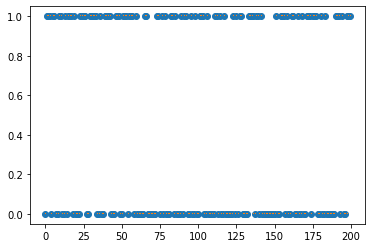

In [41]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y, 'o')
plt.plot(predicted, ',')
plt.show()